In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
drive.flush_and_unmount()

In [2]:
%cd /content/drive/MyDrive/NLP Joint Model/joint_model

/content/drive/MyDrive/NLP Joint Model/joint_model


In [3]:
!pip install -r requirements.txt

  Using cached apex-0.9.10.dev0-py3-none-any.whl


In [4]:
!pip uninstall apex -y

Found existing installation: apex 0.9.10.dev0
Uninstalling apex-0.9.10.dev0:
  Successfully uninstalled apex-0.9.10.dev0


In [5]:
!python model_train/train_para.py \
--model_name_or_path roberta-base \
--tokenizer_name roberta-base \
--task_name para \
--data_dir dataset/para_training/ \
--max_seq_length 512 \
--output_dir path_to_save_model \
--do_train \
--do_eval \
--do_predict \
--overwrite_output_dir \
--per_device_train_batch_size 4 \
--gradient_accumulation_steps 2 \
--per_device_eval_batch_size 32 \
--learning_rate 1e-5 \
--num_train_epochs 5 \
--save_steps 10000 \
--logging_steps 10000 \
--use_sent_loss \
--use_qa_loss \

Streaming output truncated to the last 5000 lines.
model answer end string =  ette
Start Position:   Jake  End Position:  orman
model answer start string =  Bl
model answer end string =   Space
Start Position:  Bl  End Position:   Space
 83% 3413/4095 [28:15<05:39,  2.01it/s]model answer start string =   Ann
model answer end string =   Arbor
Start Position:   Ann  End Position:   Arbor
model answer start string =   American
model answer end string =   American
Start Position:   American  End Position:   American
 83% 3414/4095 [28:16<05:40,  2.00it/s]model answer start string =   A
model answer end string =  ller
Start Position:   A  End Position:  ller
model answer start string =   Pin
model answer end string =   Journey
Start Position:   Pin  End Position:   Journey
 83% 3415/4095 [28:16<05:38,  2.01it/s]model answer start string =   Russell
model answer end string =  we
Start Position:   Russell  End Position:  we
model answer start string =   Community
model answer end string =   C

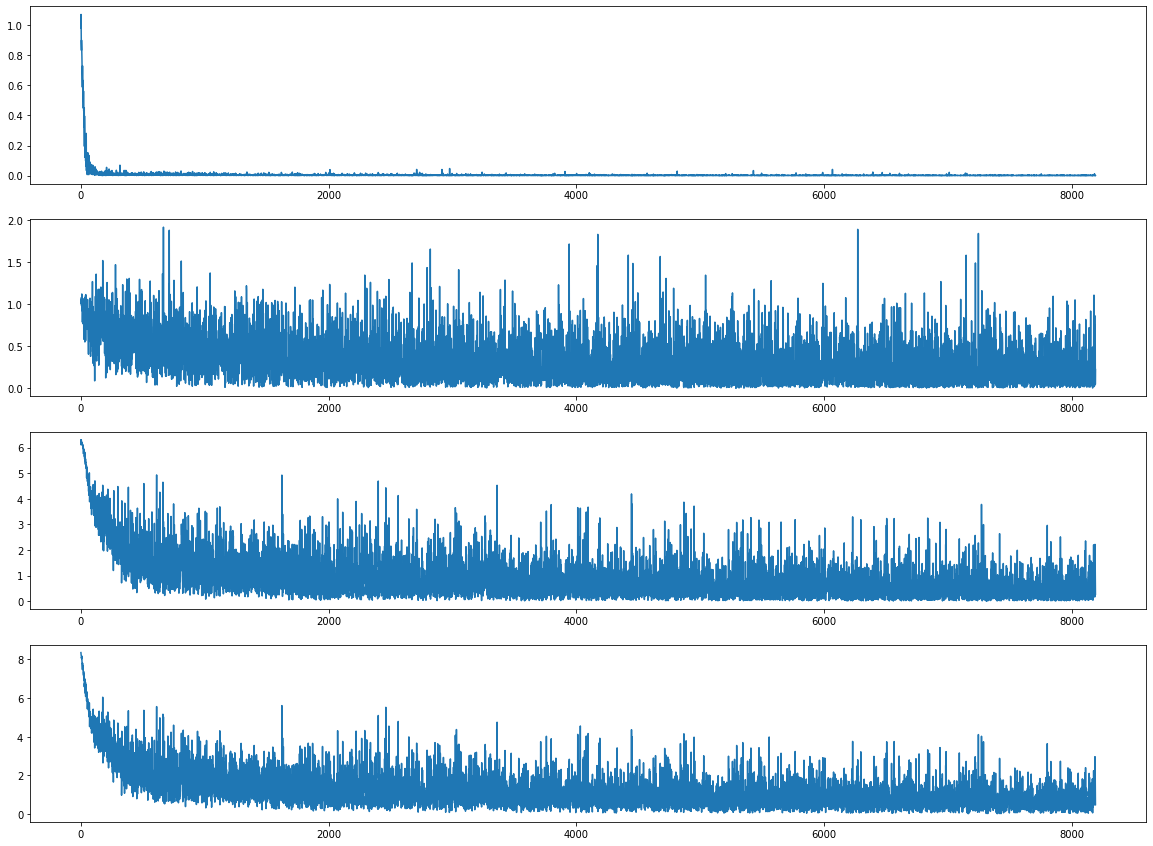

In [15]:
import matplotlib.pyplot as plt
import json

with open('/content/drive/MyDrive/NLP Joint Model/joint_model/log_loss.txt', 'r') as f:
  data = json.load(f)

fig, ax = plt.subplots(4, figsize = (20, 15))
ax[0].plot([x for x in range(1, len(data['loss1'])+1, 1)], data['loss1'])
ax[1].plot([x for x in range(len(data['loss2']))], data['loss2'])
ax[2].plot([x for x in range(len(data['loss3']))], data['loss3'])
ax[3].plot([x for x in range(len(data['Total_Loss']))], data['Total_Loss'])
plt.show()